In [1]:
from imagerecognition import ImageRecognition
from imagegeneration import ImageGeneration

In [2]:
imagereco = ImageRecognition()

# Get object from selection

In [3]:
path1 = r"C:\Users\micha\OneDrive\Pictures\my_picture_14_04_2023-2.jpg"
path2 = r"C:\Users\micha\OneDrive\Pictures\i_see.jpg"
path3 = r"C:\Users\micha\OneDrive\Pictures\20230414_095901.jpg"

imagereco.get_object_from_selection([path1, path2, path3])

('chair', 'seating')

# Get objects in image

In [4]:
with open(r"C:\Users\micha\OneDrive\Pictures\i_see.jpg", 'rb') as f:
    data = f.read()

print(imagereco.get_objects(data))

[('television', 'display'), ('chair', 'seating'), ('chair', 'seating')]


# Describe Image

In [5]:
with open(r"C:\Users\micha\OneDrive\Pictures\i_see.jpg", 'rb') as f:
    data = f.read()

print(imagereco.describe_image(data))

a room with a whiteboard and people sitting at desks


# Get single Object

In [6]:
with open(r"C:\Users\micha\OneDrive\Pictures\i_see.jpg", 'rb') as f:
    data = f.read()

print(imagereco.get_single_object(data))

('chair', 'seating')


# Generate Image with Text

In [3]:
imagegen = ImageGeneration()
imagegen.get_image_for_text('Hello, my name is Pepper and this is a long text', 70).show()

# Getting Tiles

In [6]:
from PIL import Image
import io
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

{'rectangle': {'x': 173, 'y': 307, 'w': 128, 'h': 246}, 'object': 'window', 'confidence': 0.57}
{'rectangle': {'x': 370, 'y': 363, 'w': 117, 'h': 144}, 'object': 'person', 'confidence': 0.8}
{'rectangle': {'x': 505, 'y': 338, 'w': 150, 'h': 148}, 'object': 'display', 'confidence': 0.622}
{'rectangle': {'x': 166, 'y': 359, 'w': 62, 'h': 91}, 'object': 'person', 'confidence': 0.544}
{'rectangle': {'x': 3, 'y': 333, 'w': 138, 'h': 159}, 'object': 'television', 'confidence': 0.565, 'parent': {'object': 'display', 'confidence': 0.698}}
{'rectangle': {'x': 209, 'y': 440, 'w': 123, 'h': 136}, 'object': 'chair', 'confidence': 0.665, 'parent': {'object': 'seating', 'confidence': 0.666}}
{'rectangle': {'x': 324, 'y': 439, 'w': 118, 'h': 136}, 'object': 'chair', 'confidence': 0.791, 'parent': {'object': 'seating', 'confidence': 0.791}}
{'rectangle': {'x': 413, 'y': 432, 'w': 147, 'h': 144}, 'object': 'chair', 'confidence': 0.753, 'parent': {'object': 'seating', 'confidence': 0.754}}


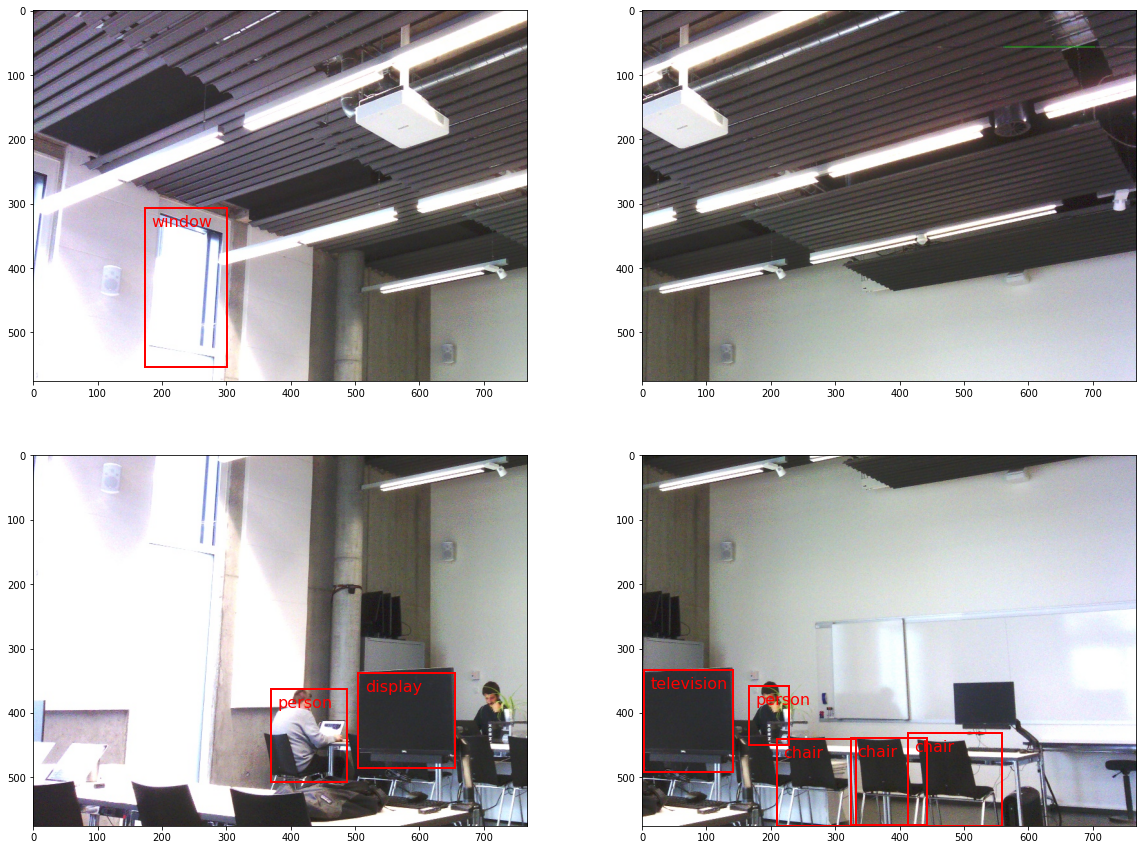

In [25]:
image = Image.open(r"C:\Users\micha\OneDrive\Pictures\i_see.jpg")
img_width, img_height = image.size

# [upper left, upper right, lower left, lower right]
tiles = [image.crop((0, 0, int(img_width * 0.6), int(img_height * 0.6))),
         image.crop((int(img_width * 0.4), 0, img_width, int(img_height * 0.6))),
         image.crop((0, int(img_height * 0.4), int(img_width * 0.6), img_height)),
         image.crop((int(img_width * 0.4), int(img_height * 0.4), img_width, img_height))]

fig, axs = plt.subplots(2, 2, figsize=(20,15))

for i, tile in enumerate(tiles):
    if i < 2:
        a = 0
    else:
        a = 1
    if i % 2 == 0:
        b = 0
    else:
        b = 1
    url = 'https://pepper-image-recognition.cognitiveservices.azure.com/vision/v3.2/detect?model-version=latest'
    headers = {
        'Ocp-Apim-Subscription-Key': '',
        'Content-Type': 'application/octet-stream'
    }
    img_byte_arr = io.BytesIO()
    tile.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    response = requests.post(url, headers=headers, data=img_byte_arr)

    axs[a][b].imshow(tile)

    #add rectangle
   
    for obj in response.json()['objects']:
        x = obj['rectangle']['x']
        y = obj['rectangle']['y']
        w = obj['rectangle']['w']
        h = obj['rectangle']['h']
        axs[a][b].add_patch(Rectangle((x,y),w,h,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
        axs[a][b].text(x + 10, y + 10, obj['object'], va='top', fontsize=16, color='red')